In [14]:
# -----------------------------
# 1. Import libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# -----------------------------
# 2. Load dataset
# -----------------------------
df = pd.read_csv('Clean_Dataset.csv')
print(df.head())
print("Shape of Dataset:", df.shape)
print("Columns:", df.columns)

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
Shape of Dataset: (300153, 12)
Columns: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 

In [16]:
# -----------------------------
# 3. Basic information
# -----------------------------
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000

In [17]:
# -----------------------------
# 4. Data cleaning
# -----------------------------
# Remove unnecessary column
df = df.drop(columns=['Unnamed: 0'])

# Save permanently cleaned dataset
df.to_csv("Clean_Dataset_Final.csv", index=False)

print(df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Duplicate Rows: 0


In [18]:
df.columns


Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [19]:
# -----------------------------
# 5. Show unique categorical values
# -----------------------------
categorical_cols = ['airline', 'source_city', 'destination_city', 
                    'stops', 'class', 'departure_time', 'arrival_time']

for col in categorical_cols:
    print(f"Unique values in {col}: ", df[col].unique())


Unique values in airline:  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in source_city:  ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in destination_city:  ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in stops:  ['zero' 'one' 'two_or_more']
Unique values in class:  ['Economy' 'Business']
Unique values in departure_time:  ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in arrival_time:  ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


## 6. Visualizations

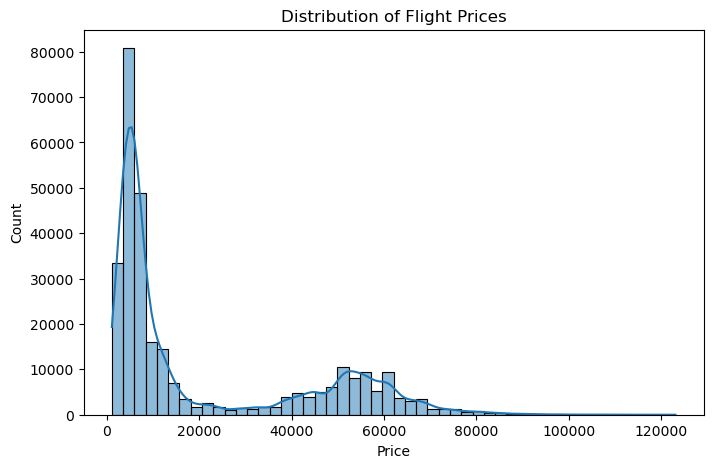

In [20]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

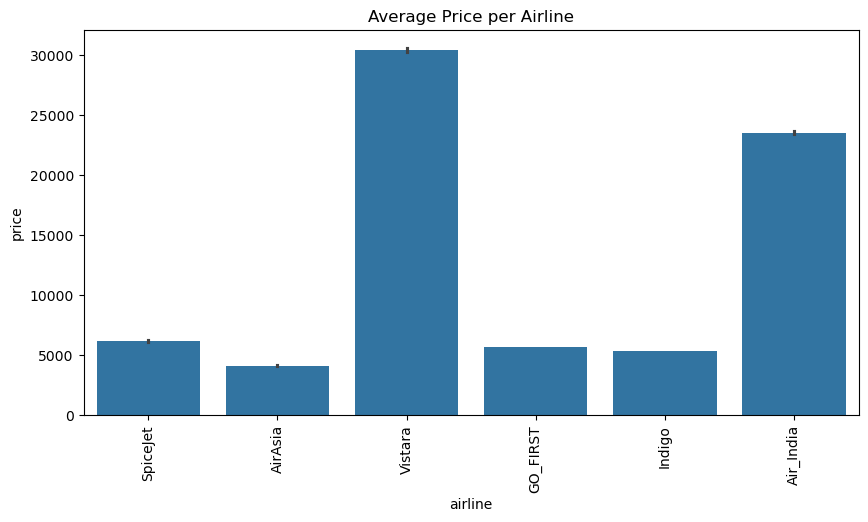

In [21]:
# Airline vs price
plt.figure(figsize=(10,5))
sns.barplot(x='airline', y='price', data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Price per Airline")
plt.show()

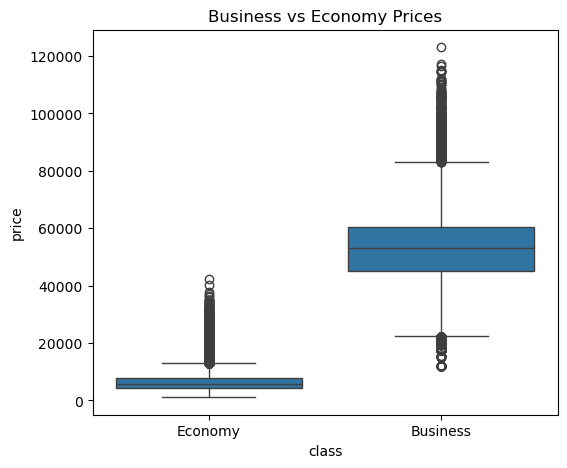

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(x='class', y='price', data=df)
plt.title("Business vs Economy Prices")
plt.show()

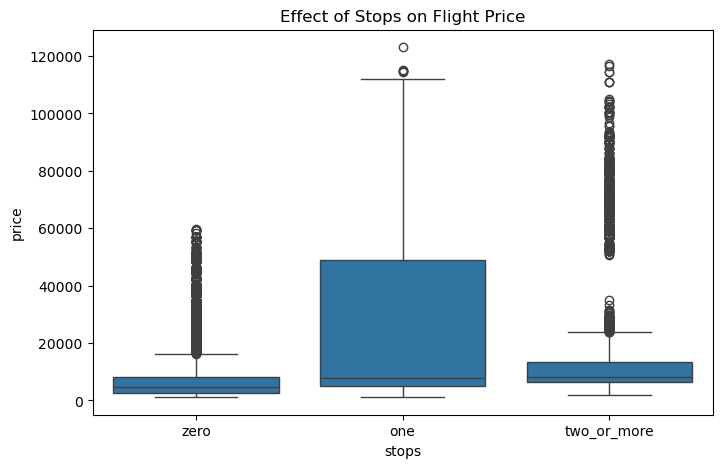

In [23]:
# Stops vs price
plt.figure(figsize=(8,5))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Effect of Stops on Flight Price")
plt.show()

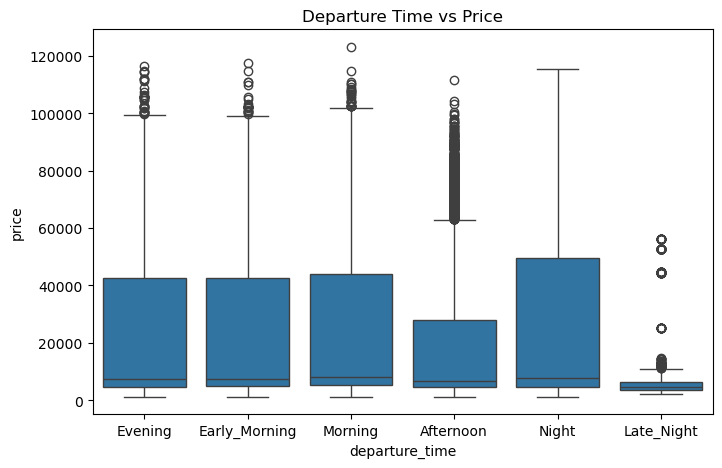

In [24]:
# Departure time vs price
plt.figure(figsize=(8,5))
sns.boxplot(x='departure_time', y='price', data=df)
plt.title("Departure Time vs Price")
plt.show()

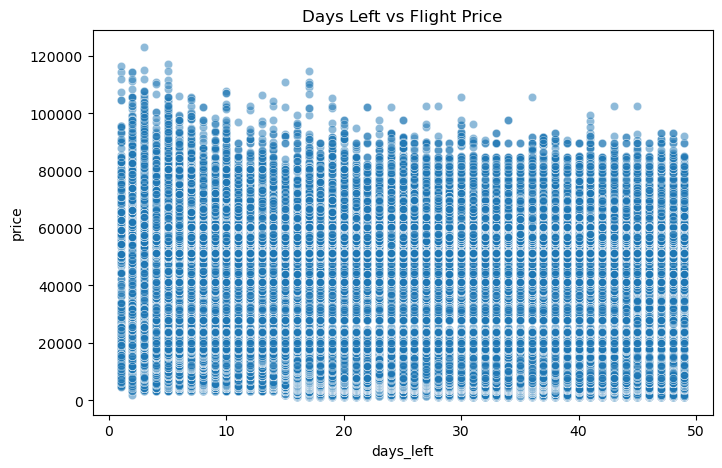

In [25]:
# Days left vs price
plt.figure(figsize=(8,5))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.5)
plt.title("Days Left vs Flight Price")
plt.show()

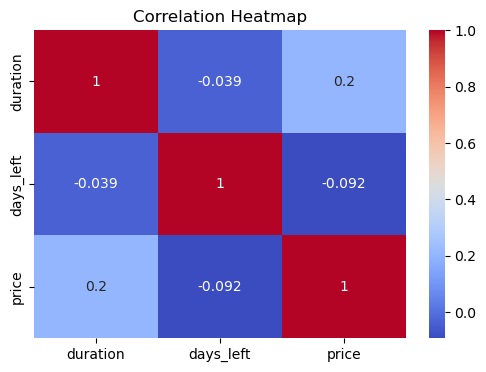

In [26]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()